In [1]:
import os 
from glob import glob

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# 압축 풀기
!unzip -qq /content/drive/"My Drive"/"[AOP:딥러닝 인공지능]"/TEST/"1. [Tensorflow 2.0 과 Pytorch]"/"3. 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch"/"3. dataset"/cifar.zip


In [5]:
data_paths=glob('/content/cifar/train/*.png')
data_paths.sort()
data_paths[0]

'/content/cifar/train/0_frog.png'

In [8]:
path = data_paths[0]
path

'/content/cifar/train/0_frog.png'

In [9]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [10]:
image.shape

TensorShape([32, 32, 3])

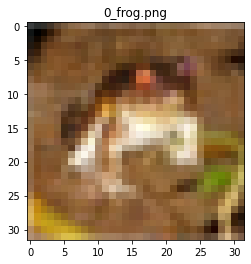

In [12]:
plt.title(os.path.basename(path))
plt.imshow(image)
plt.show()

# tf.data

In [13]:
data_paths[:10]

['/content/cifar/train/0_frog.png',
 '/content/cifar/train/10000_automobile.png',
 '/content/cifar/train/10001_frog.png',
 '/content/cifar/train/10002_frog.png',
 '/content/cifar/train/10003_ship.png',
 '/content/cifar/train/10004_ship.png',
 '/content/cifar/train/10005_cat.png',
 '/content/cifar/train/10006_deer.png',
 '/content/cifar/train/10007_frog.png',
 '/content/cifar/train/10008_airplane.png']

In [14]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)
    return image

In [15]:
  dataset = tf.data.Dataset.from_tensor_slices(data_paths)
  dataset = dataset.map(read_image)

In [16]:
tf_image = next(iter(dataset))
tf_image.shape

TensorShape([32, 32, 3])

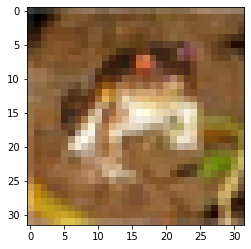

In [18]:
plt.imshow(tf_image)
plt.show()

## Batch로 묶기

In [20]:
batch_size=8

In [22]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)
dataset = dataset.batch(batch_size)

In [23]:
tf_image = next(iter(dataset))

In [25]:
tf_image.shape

TensorShape([8, 32, 32, 3])

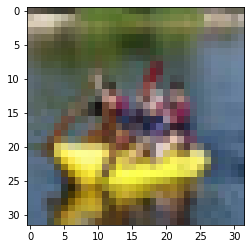

In [27]:
plt.imshow(tf_image[4])
plt.show()

## Shuffle 하기

In [31]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)
dataset = dataset.batch(batch_size)
dataset = dataset.shuffle(buffer_size=len(data_paths))

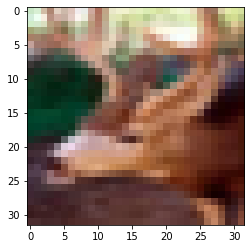

In [32]:
tf_images = next(iter(dataset))
plt.imshow(tf_images[0])
plt.show()

## Label하고 같이 넣기 

In [33]:
path

'/content/cifar/train/0_frog.png'

In [34]:
class_name = path.split('_')[-1].replace('.png','')
class_name

'frog'

In [35]:
def get_label(path):
  return path.split('_')[-1].replace('.png','')

In [36]:
path, get_label(path)

('/content/cifar/train/0_frog.png', 'frog')

In [37]:
label_names = [get_label(path) for path in data_paths]

In [38]:
label_names[:10]

['frog',
 'automobile',
 'frog',
 'frog',
 'ship',
 'ship',
 'cat',
 'deer',
 'frog',
 'airplane']

In [39]:
class_names = np.unique(label_names)
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [40]:
# 원핫인코딩 개념
class_names == 'frog'

array([False, False, False, False, False, False,  True, False, False,
       False])

In [42]:
# 원핫인코딩 테스트
onehot_encoding = np.array(class_names == 'frog', np.uint8)
onehot_encoding

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [43]:
# 원핫 인코딩 함수로 구현.
def onehot_encoding(label):
  return np.array(class_names == label, np.uint8)

In [44]:
data_paths[:10]

['/content/cifar/train/0_frog.png',
 '/content/cifar/train/10000_automobile.png',
 '/content/cifar/train/10001_frog.png',
 '/content/cifar/train/10002_frog.png',
 '/content/cifar/train/10003_ship.png',
 '/content/cifar/train/10004_ship.png',
 '/content/cifar/train/10005_cat.png',
 '/content/cifar/train/10006_deer.png',
 '/content/cifar/train/10007_frog.png',
 '/content/cifar/train/10008_airplane.png']

In [45]:
label_names[:10]

['frog',
 'automobile',
 'frog',
 'frog',
 'ship',
 'ship',
 'cat',
 'deer',
 'frog',
 'airplane']

In [47]:
# 인자를 2개 받을 수 있는 read_image_label 함수 생성
def read_image_label(path, label):
  gfile = tf.io.read_file(path)
  image = tf.io.decode_image(gfile)
  return image, label

In [49]:
dataset = tf.data.Dataset.from_tensor_slices((data_paths, label_names)) # 인자 1 : 경로, 인자 2 : 라벨
dataset = dataset.map(read_image_label) # 인자가 2개이므로 2개 받을 수 있는 함수 필요
dataset = dataset.batch(batch_size)
dataset = dataset.repeat()

In [50]:
image, label = next(iter(dataset))

In [51]:
image.shape, label.shape

(TensorShape([8, 32, 32, 3]), TensorShape([8]))

In [52]:
label[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'frog'>

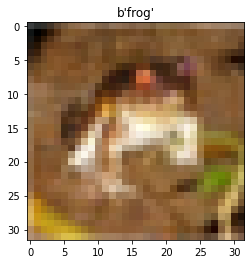

In [53]:
plt.imshow(image[0])
plt.title(np.array(label[0]))
plt.show()

## tensorflow 함수로 label 얻기

In [54]:
path

'/content/cifar/train/0_frog.png'

In [59]:
fname = tf.strings.split(path, '_')[-1]
fname

<tf.Tensor: shape=(), dtype=string, numpy=b'frog.png'>

In [61]:
cls_name = tf.strings.regex_replace(fname, '.png', '')
cls_name

<tf.Tensor: shape=(), dtype=string, numpy=b'frog'>

In [62]:
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [66]:
class_names == cls_name

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([False, False, False, False, False, False,  True, False, False,
       False])>

In [67]:
# tf.cast로 원핫인코딩 하는 방식
onehot_encoding = tf.cast(class_names == cls_name, tf.uint8) #불린을 인티저로 변환
onehot_encoding

<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)>

In [68]:
# 위 과정을 함수로 정리해보자.
def get_label(path):
  fname = tf.strings.split(path, '_')[-1]
  cls_name = tf.strings.regex_replace(fname, '.png', '')
  onehot_encoding = tf.cast(class_names == cls_name, tf.uint8)
  return onehot_encoding

In [70]:
def read_image_label(path): # 인자는 하나
  # read image
  gfile = tf.io.read_file(path)
  image = tf.io.decode_image(gfile)

  # get label
  label = get_label(path)

  return image, label # 아웃풋은 2

In [71]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths) # 인자 하나
dataset = dataset.map(read_image_label)
dataset = dataset.batch(batch_size)
dataset = dataset.repeat()

In [72]:
image, label = next(iter(dataset))

In [73]:
image.shape, label.shape

(TensorShape([8, 32, 32, 3]), TensorShape([8, 10]))

In [74]:
label[0]

<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)>

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


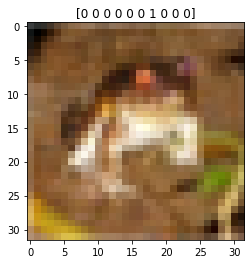

In [75]:
plt.imshow(image[0])
plt.title(np.array(label[0]))
plt.show()